# Cleaning & Exploring

### Data_description

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/cristianvaleria/opt/anaconda3/envs/final_project/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#!ls ../Data/Raw/German_Credit

In [3]:
data_1 = pd.read_csv('../Data/Raw/german_credit_15.38.59.csv')
display(data_1.head())
display(data_1.shape)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


(1000, 21)

In [4]:
data_2 = pd.read_csv('../Data/Raw/german_credit_data_updated.csv')
display(data_2.head())
display(data_2.shape)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,2,49,male,1,own,little,NaN,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,2


(954, 11)

In [5]:
cols = []
for col in data_1.columns:
  cols.append(col.lower().replace(' ', '_'))
data_1.columns = cols

cols = []
for col in data_2.columns:
  cols.append(col.lower().replace(' ', '_'))
data_2.columns = cols

In [6]:
data_2.credit_amount.unique().shape

(884,)

In [7]:
data_1.credit_amount.unique().shape

(923,)

In [8]:
data_1.rename(columns={"age_(years)": "age"}, inplace=True)

In [9]:
data = data_2.merge(data_1, left_on=['credit_amount','age'], right_on=['credit_amount','age'])

In [10]:
data.head()

,unnamed:_0,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose_x,...,guarantors,duration_in_current_address,most_valuable_available_asset,concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,no_of_dependents,telephone,foreign_worker
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,...,1,4,1,3,2,2,3,1,2,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,...,1,2,1,3,2,1,3,1,1,1
2,2,49,male,1,own,little,NaN,2096,12,education,...,1,3,1,3,2,1,2,2,1,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,...,3,4,2,3,3,1,3,2,1,1
4,4,53,male,2,free,little,little,4870,24,car,...,1,4,4,3,3,2,3,2,1,1


In [11]:
data[['age','duration','duration_of_credit_(month)',"credit_amount",'purpose_x','purpose_y']]

,age,duration,duration_of_credit_(month),credit_amount,purpose_x,purpose_y
0,67,6,6,1169,radio/TV,3
1,22,48,48,5951,radio/TV,3
2,49,12,12,2096,education,6
3,45,42,42,7882,furniture/equipment,2
4,53,24,24,4870,car,0
...,...,...,...,...,...,...
944,31,24,24,3621,radio/TV,3
945,40,18,18,3590,business,9
946,24,36,36,2145,business,9
947,28,24,24,4113,car,1


In [12]:
data['check'] = data['duration']-data['duration_of_credit_(month)']

In [13]:
data = data[data['check']==0]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 948
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   unnamed:_0                         944 non-null    int64 
 1   age                                944 non-null    int64 
 2   sex                                944 non-null    object
 3   job                                944 non-null    int64 
 4   housing                            944 non-null    object
 5   saving_accounts                    770 non-null    object
 6   checking_account                   571 non-null    object
 7   credit_amount                      944 non-null    int64 
 8   duration                           944 non-null    int64 
 9   purpose_x                          944 non-null    object
 10  credit_risk                        944 non-null    int64 
 11  creditability                      944 non-null    int64 
 12  account_

#  Columns exploration & droping

In [15]:
data.isnull().sum()/len(data)

unnamed:_0                           0.000000
age                                  0.000000
sex                                  0.000000
job                                  0.000000
housing                              0.000000
saving_accounts                      0.184322
checking_account                     0.395127
credit_amount                        0.000000
duration                             0.000000
purpose_x                            0.000000
credit_risk                          0.000000
creditability                        0.000000
account_balance                      0.000000
duration_of_credit_(month)           0.000000
payment_status_of_previous_credit    0.000000
purpose_y                            0.000000
value_savings/stocks                 0.000000
length_of_current_employment         0.000000
instalment_per_cent                  0.000000
sex_&_marital_status                 0.000000
guarantors                           0.000000
duration_in_current_address       

In [16]:
data.saving_accounts.value_counts()

little        570
moderate       96
quite rich     58
rich           46
Name: saving_accounts, dtype: int64

In [17]:
data.checking_account.value_counts()

little      260
moderate    253
rich         58
Name: checking_account, dtype: int64

In [18]:
data.drop(columns=['saving_accounts','checking_account'], inplace=True)

In [19]:
data.drop(columns='unnamed:_0', inplace = True)

In [20]:
data.iloc[:,:15]

,age,sex,job,housing,credit_amount,duration,purpose_x,credit_risk,creditability,account_balance,duration_of_credit_(month),payment_status_of_previous_credit,purpose_y,value_savings/stocks,length_of_current_employment
0,67,male,2,own,1169,6,radio/TV,1,1,1,6,4,3,5,5
1,22,female,2,own,5951,48,radio/TV,2,0,2,48,2,3,1,3
2,49,male,1,own,2096,12,education,1,1,4,12,4,6,1,4
3,45,male,2,free,7882,42,furniture/equipment,1,1,1,42,2,2,1,4
4,53,male,2,free,4870,24,car,2,0,1,24,3,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,31,male,2,own,3621,24,radio/TV,2,0,4,24,2,3,2,5
945,40,male,0,own,3590,18,business,1,1,2,18,4,9,1,1
946,24,male,2,own,2145,36,business,2,0,1,36,3,9,1,4
947,28,female,2,rent,4113,24,car,2,0,2,24,2,1,3,2


### Age

In [21]:
data.age.isnull().sum()

0

<Axes: ylabel='Frequency'>

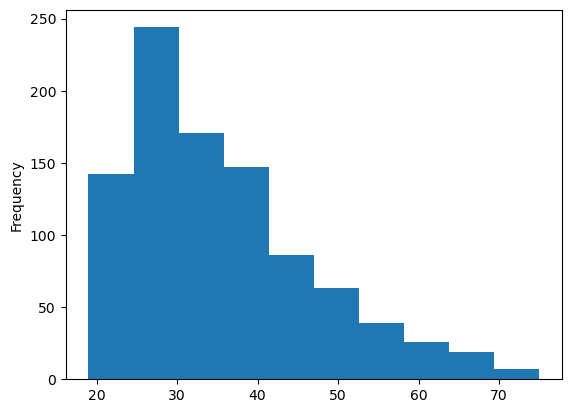

In [22]:
data.age.plot(kind="hist")

### Sex

In [23]:
data.sex.isnull().sum()

0

In [24]:
data.sex.value_counts()

male      647
female    297
Name: sex, dtype: int64

In [25]:
def sex(x):
    if x == 'male':
        return 1
    else:
        return 2

data['sex'] = data['sex'].apply(sex)

### job

- A171 (0): unemployed/ unskilled - non-resident
- A172 (1): unskilled - resident
- A173 (2): skilled employee / official
- A174 (3): management/ self-employed/highly qualified employee/ officer

In [26]:
data.job.value_counts()

2    602
1    182
3    139
0     21
Name: job, dtype: int64

In [27]:
#downloading the original data

In [28]:
data_3 = pd.read_csv('../Data/Raw/german_uci_risk.data', sep=" ",header=None)
display(data_3.head())
display(data_3.shape)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


(1000, 21)

In [29]:
data_3[16].value_counts()

A173    630
A172    200
A174    148
A171     22
Name: 16, dtype: int64

In [30]:
data.job.isnull().sum()

0

<Axes: ylabel='Frequency'>

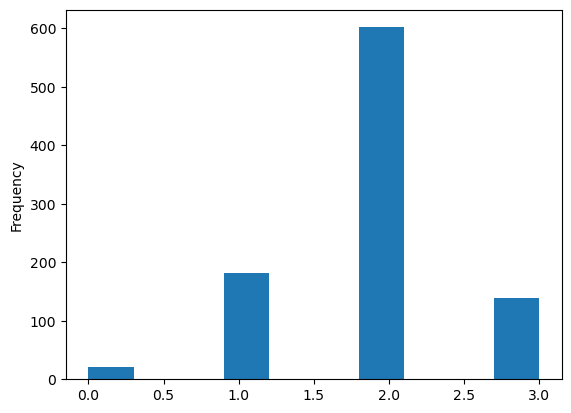

In [31]:
data.job.plot(kind='hist')

### Housing

In [32]:
data.housing.value_counts()

own     670
rent    169
free    105
Name: housing, dtype: int64

<font color='blue'> dummify <font>

### credit_amount

/var/folders/2b/6f80d7g11sl53b_wrqy2w81r0000gn/T/ipykernel_36952/3503212106.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


<Axes: xlabel='credit_amount', ylabel='Count'>

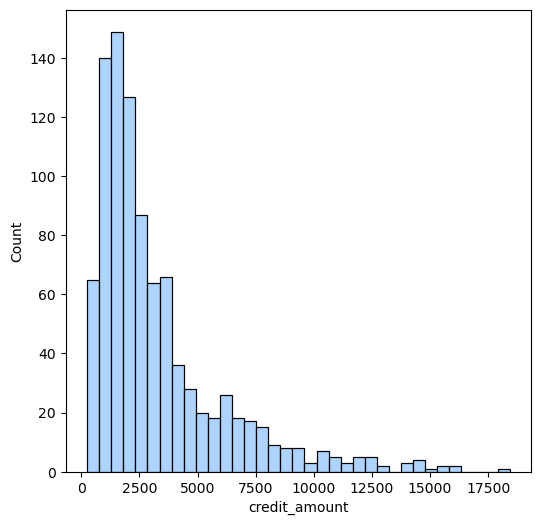

In [33]:
plt.figure(figsize=(6, 6))
plt.style.use('seaborn-pastel')

sns.histplot(x='credit_amount',data=data)

### duration

In [34]:
data.duration.unique()

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 11, 27,  8, 54,
       20, 14, 33, 21, 16, 45,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40])

<Axes: xlabel='duration', ylabel='Count'>

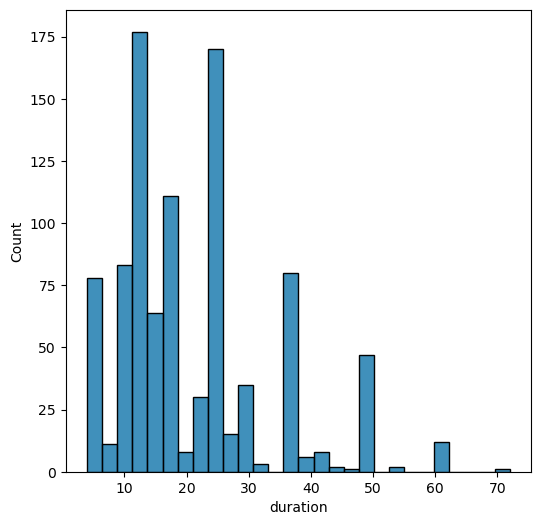

In [35]:
plt.figure(figsize=(6,6))
plt.style.use('tableau-colorblind10')

sns.histplot(x='duration', data=data)

In [36]:
data.drop(columns='duration_of_credit_(month)',inplace=True)

### purpose

In [37]:
data.drop(columns='purpose_y',inplace=True)

In [38]:
data.rename(columns={'purpose_x':'purpose'},inplace=True)

In [39]:
data.purpose.value_counts()

car                    321
radio/TV               257
furniture/equipment    173
business                91
education               58
repairs                 20
domestic appliances     12
vacation/others         12
Name: purpose, dtype: int64

<font color='blue'> dummify <font>

### credit_risk

possible column y: (1 = Good, 2 = Bad)

In [40]:
data.credit_risk.value_counts()

1    656
2    288
Name: credit_risk, dtype: int64

In [41]:
data.rename(columns={'credit_risk':'y_credit_risk'},inplace=True)

### creditability

Column y = 1:good, 0:bad, no credit.

<br>
Same column as credit risk

In [42]:
data.creditability.value_counts()

1    656
0    288
Name: creditability, dtype: int64

In [43]:
data.rename(columns={'creditability':'y_creditability'},inplace=True)

In [44]:
data[['y_creditability','y_credit_risk']]

,y_creditability,y_credit_risk
0,1,1
1,0,2
2,1,1
3,1,1
4,0,2
...,...,...
944,0,2
945,1,1
946,0,2
947,0,2


In [45]:
data.drop(columns='y_credit_risk',inplace=True)

### account_balance 


Status of existing checking account
- 1 (A11) : ... < 0 Eu
- 2 (A12) : 0 <= ... < 400 Eu
- 3 (A13) : ... >= 400 Eu 
- 4 (A14) : no checking account

In [46]:
data.account_balance.value_counts()

4    373
1    260
2    253
3     58
Name: account_balance, dtype: int64

<Axes: xlabel='account_balance', ylabel='Count'>

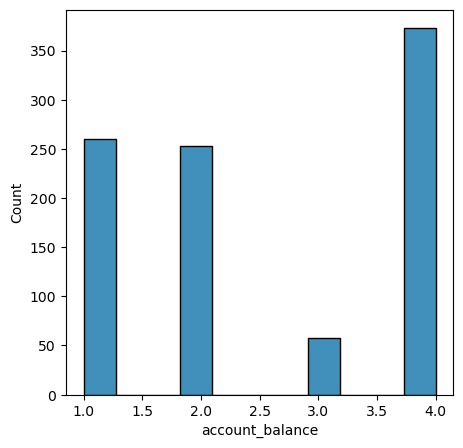

In [47]:
plt.figure(figsize=(5,5))
plt.style.use('tableau-colorblind10')

sns.histplot(x='account_balance', data=data)

<font color='blue'> maybe drop </font>

### credit_history / payment_status_of_previous_credit

In [48]:
data.payment_status_of_previous_credit.value_counts()

2    501
4    276
3     83
1     45
0     39
Name: payment_status_of_previous_credit, dtype: int64

In [49]:
data.rename(columns={'payment_status_of_previous_credit':'credit_history'},inplace=True)

Credit history
- 0 (A30) : no credits taken/ all credits paid back duly
- 1 (A31) : all credits at this bank paid back duly
- 2 (A32) : existing credits paid back duly till now
- 3 (A33) : delay in paying off in the past
- 4 (A34) : critical account/ other credits existing (not at this bank)

### savings / value_savings/stocks

- 1 (A61) : ... < 200 Eu
- 2 (A62) : 200 <= ... < 1000 Eu
- 3 (A63) : 1000 <= ... < 2000 Eu
- 4 (A64) : .. >= 2000 Eu
- 5 (A65) : unknown/ no savings account

In [50]:
data['value_savings/stocks'].value_counts()

1    570
5    174
2     96
3     58
4     46
Name: value_savings/stocks, dtype: int64

In [51]:
data.rename(columns={'value_savings/stocks':'savings'},inplace=True)

### length_of_current_employment

Present employment since:

- 1 (A71) : unemployed
- 2 (A72) : ... < 1 year
- 3 (A73) : 1 <= ... < 4 years
- 4 (A74) : 4 <= ... < 7 years
- 5 (A75) : .. >= 7 years

In [52]:
data.length_of_current_employment.value_counts()

3    316
5    236
4    168
2    168
1     56
Name: length_of_current_employment, dtype: int64

### instalment_per_cent

Installment rate in percentage of disposable income

In [53]:
data.instalment_per_cent.value_counts()

4    448
2    218
3    147
1    131
Name: instalment_per_cent, dtype: int64

In [54]:
data.drop(columns = ['instalment_per_cent'], inplace = True)

### sex_&_marital_status

In [55]:
data['sex_&_marital_status'].value_counts()

3    514
2    297
4     87
1     46
Name: sex_&_marital_status, dtype: int64

Personal status and sex
1. A91 : male : divorced/separated
2. A92 : female : divorced/separated/married
3. A93 : male : single
4. A94 : male : married/widowed
5. A95 : female : single

In [56]:
data_3[8].value_counts()

A93    548
A92    310
A94     92
A91     50
Name: 8, dtype: int64

In [57]:
data.rename(columns = {'sex_&_marital_status':'marital_status'}, inplace = True)

### guarantors

In [58]:
data.guarantors.value_counts()

1    856
3     49
2     39
Name: guarantors, dtype: int64

Other debtors / guarantors
1. A101 : none
2. A102 : co-applicant
3. A103 : guarantor

### duration_in_current_address

In [59]:
data.duration_in_current_address.value_counts()

4    389
2    286
3    144
1    125
Name: duration_in_current_address, dtype: int64

In [60]:
data.drop(columns='duration_in_current_address',inplace = True)

### property / most_valuable_available_asset

In [61]:
data.rename(columns={"most_valuable_available_asset":'property'}, inplace = True)

In [62]:
data.property.value_counts()

3    315
1    270
2    211
4    148
Name: property, dtype: int64

1. A121 : real estate
2. A122 : if not A121 : building society savings agreement/ life insurance
3. A123 : if not A121/A122 : car or other, not in attribute 6
4. A124 : unknown / no property

### concurrent_credits

In [63]:
data.concurrent_credits.value_counts()

3    766
1    132
2     46
Name: concurrent_credits, dtype: int64

Other installment plans
1. A141 : bank
2. A142 : stores
3. A143 : none

In [64]:
data_3[13].value_counts()

A143    814
A141    139
A142     47
Name: 13, dtype: int64

### type_of_apartment = Housing

In [65]:
data.type_of_apartment.value_counts()

2    671
1    169
3    104
Name: type_of_apartment, dtype: int64

Housing
- A151 : rent
- A152 : own
- A153 : for free

In [66]:
data.drop(columns = 'type_of_apartment', inplace = True)

### no_of_credits_at_this_bank

In [67]:
data.no_of_credits_at_this_bank.value_counts()

1    599
2    312
3     27
4      6
Name: no_of_credits_at_this_bank, dtype: int64

(numerical)
Number of existing credits at this bank


### occupation (equal to job)

In [68]:
data.occupation.value_counts()

3    602
2    182
4    139
1     21
Name: occupation, dtype: int64

In [69]:
data.drop(columns='occupation', inplace = True)

### no_of_dependents

In [70]:
data.no_of_dependents.value_counts()

1    795
2    149
Name: no_of_dependents, dtype: int64

### telephone

In [71]:
data.telephone.value_counts()

1    559
2    385
Name: telephone, dtype: int64

1. A191 : none
2. A192 : yes, registered under the customers name

### foreign_worker

In [72]:
data.foreign_worker.value_counts()

1    907
2     37
Name: foreign_worker, dtype: int64

foreign worker
1. A201 : yes
2. A202 : no

In [73]:
data.drop(columns='check',inplace=True)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 948
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age                           944 non-null    int64 
 1   sex                           944 non-null    int64 
 2   job                           944 non-null    int64 
 3   housing                       944 non-null    object
 4   credit_amount                 944 non-null    int64 
 5   duration                      944 non-null    int64 
 6   purpose                       944 non-null    object
 7   y_creditability               944 non-null    int64 
 8   account_balance               944 non-null    int64 
 9   credit_history                944 non-null    int64 
 10  savings                       944 non-null    int64 
 11  length_of_current_employment  944 non-null    int64 
 12  marital_status                944 non-null    int64 
 13  guarantors          

### Dummy

In [75]:
data.columns

Index(['age', 'sex', 'job', 'housing', 'credit_amount', 'duration', 'purpose',
       'y_creditability', 'account_balance', 'credit_history', 'savings',
       'length_of_current_employment', 'marital_status', 'guarantors',
       'property', 'concurrent_credits', 'no_of_credits_at_this_bank',
       'no_of_dependents', 'telephone', 'foreign_worker'],
      dtype='object')

In [76]:
data = data[['age', 'sex', 'job', 'housing', 'credit_amount', 'duration', 'purpose',
        'account_balance', 'credit_history', 'savings',
       'length_of_current_employment', 'marital_status', 'guarantors',
       'property', 'concurrent_credits',
       'no_of_credits_at_this_bank', 'no_of_dependents', 'telephone',
       'foreign_worker','y_creditability']]

In [77]:

to_encode = ['purpose','housing']

def one_hot_encode(_dataframe, list_of_columns_to_one_hot_encode):
    for column in list_of_columns_to_one_hot_encode:

        one_hot_encoded_values = pd.get_dummies(_dataframe[column], prefix=column)


        _dataframe = pd.concat([_dataframe, one_hot_encoded_values], axis=1)


        _dataframe.drop([column], axis=1, inplace=True)
    
    return _dataframe

data_encoded = one_hot_encode(data, to_encode)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 948
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age                           944 non-null    int64 
 1   sex                           944 non-null    int64 
 2   job                           944 non-null    int64 
 3   housing                       944 non-null    object
 4   credit_amount                 944 non-null    int64 
 5   duration                      944 non-null    int64 
 6   purpose                       944 non-null    object
 7   account_balance               944 non-null    int64 
 8   credit_history                944 non-null    int64 
 9   savings                       944 non-null    int64 
 10  length_of_current_employment  944 non-null    int64 
 11  marital_status                944 non-null    int64 
 12  guarantors                    944 non-null    int64 
 13  property            

In [79]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 948
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           944 non-null    int64
 1   sex                           944 non-null    int64
 2   job                           944 non-null    int64
 3   credit_amount                 944 non-null    int64
 4   duration                      944 non-null    int64
 5   account_balance               944 non-null    int64
 6   credit_history                944 non-null    int64
 7   savings                       944 non-null    int64
 8   length_of_current_employment  944 non-null    int64
 9   marital_status                944 non-null    int64
 10  guarantors                    944 non-null    int64
 11  property                      944 non-null    int64
 12  concurrent_credits            944 non-null    int64
 13  no_of_credits_at_this_bank    944 n

In [80]:
data_encoded.columns

Index(['age', 'sex', 'job', 'credit_amount', 'duration', 'account_balance',
       'credit_history', 'savings', 'length_of_current_employment',
       'marital_status', 'guarantors', 'property', 'concurrent_credits',
       'no_of_credits_at_this_bank', 'no_of_dependents', 'telephone',
       'foreign_worker', 'y_creditability', 'purpose_business', 'purpose_car',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/TV', 'purpose_repairs',
       'purpose_vacation/others', 'housing_free', 'housing_own',
       'housing_rent'],
      dtype='object')

In [81]:
data_encoded = data_encoded[['age', 'sex', 'job', 'credit_amount', 'duration', 'account_balance',
       'credit_history', 'savings', 'length_of_current_employment',
       'marital_status', 'guarantors', 'property', 'concurrent_credits',
       'no_of_credits_at_this_bank', 'no_of_dependents', 'telephone',
       'foreign_worker', 'purpose_business', 'purpose_car',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/TV', 'purpose_repairs',
       'purpose_vacation/others', 'housing_free', 'housing_own',
       'housing_rent', 'y_creditability']]

In [82]:
data_encoded.reset_index(inplace=True)

In [83]:
data_encoded.drop(columns='index',inplace=True)

In [84]:
data_encoded.head()

,age,sex,job,credit_amount,duration,account_balance,credit_history,savings,length_of_current_employment,marital_status,...,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,housing_free,housing_own,housing_rent,y_creditability
0,67,1,2,1169,6,1,4,5,5,3,...,0,0,0,1,0,0,0,1,0,1
1,22,2,2,5951,48,2,2,1,3,2,...,0,0,0,1,0,0,0,1,0,0
2,49,1,1,2096,12,4,4,1,4,3,...,0,1,0,0,0,0,0,1,0,1
3,45,1,2,7882,42,1,2,1,4,3,...,0,0,1,0,0,0,1,0,0,1
4,53,1,2,4870,24,1,3,1,3,3,...,0,0,0,0,0,0,1,0,0,0


In [85]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           944 non-null    int64
 1   sex                           944 non-null    int64
 2   job                           944 non-null    int64
 3   credit_amount                 944 non-null    int64
 4   duration                      944 non-null    int64
 5   account_balance               944 non-null    int64
 6   credit_history                944 non-null    int64
 7   savings                       944 non-null    int64
 8   length_of_current_employment  944 non-null    int64
 9   marital_status                944 non-null    int64
 10  guarantors                    944 non-null    int64
 11  property                      944 non-null    int64
 12  concurrent_credits            944 non-null    int64
 13  no_of_credits_at_this_bank    944 n

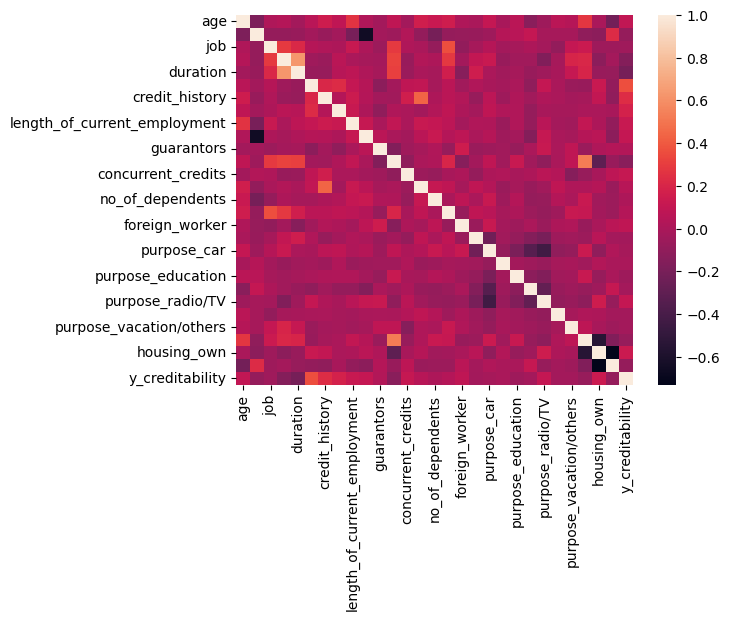

In [86]:
corr_matrix = data_encoded.corr()

import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corr_matrix, annot=False)
plt.show()


## Export

In [87]:
data_encoded.to_csv('../Data/Cleaned/data_cleaned.csv',index=False)

In [88]:
data.head()

,age,sex,job,housing,credit_amount,duration,purpose,account_balance,credit_history,savings,length_of_current_employment,marital_status,guarantors,property,concurrent_credits,no_of_credits_at_this_bank,no_of_dependents,telephone,foreign_worker,y_creditability
0,67,1,2,own,1169,6,radio/TV,1,4,5,5,3,1,1,3,2,1,2,1,1
1,22,2,2,own,5951,48,radio/TV,2,2,1,3,2,1,1,3,1,1,1,1,0
2,49,1,1,own,2096,12,education,4,4,1,4,3,1,1,3,1,2,1,1,1
3,45,1,2,free,7882,42,furniture/equipment,1,2,1,4,3,3,2,3,1,2,1,1,1
4,53,1,2,free,4870,24,car,1,3,1,3,3,1,4,3,2,2,1,1,0
